
I


In the next few sections, we show some quick methods to generate synthetic dataset for practicing statistical modeling and machine learning.
The demo notebook can be found here in my Github repository.

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
# def test(samples, feats, info, targets):
#     X,y = make_regression(
#     n_samples=samples,
#     n_features=feats,
#     n_informative=info,
#     n_targets=targets,
#     bias=1.0,
#     effective_rank=None,
#     tail_strength=0.5,
#     noise=0,
#     shuffle=True,
#     coef=False,
#     random_state=None)
#     return

X,y, coef = make_regression(
        n_samples=1000,
        n_features=10,
        n_informative=5,
        n_targets=1,
        bias=0, 
        effective_rank=None, 
        tail_strength=0.5, 
        noise=500, 
        shuffle=True,
        coef=True, 
        random_state=1
)

df_reg = pd.DataFrame(X, columns =['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'])
df_reg.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.699833,-1.751113,0.680654,-1.443121,1.576356,-0.442637,-0.125631,0.212831,-1.036174,0.534143
1,-0.786868,0.151321,1.089231,1.077663,1.156548,1.094927,1.868975,-0.002238,-0.800603,0.891848
2,-0.407013,-0.212508,0.316530,-0.930115,-0.860615,-0.058339,-0.485400,-0.333856,-0.683713,-1.168142
3,0.152374,-1.814727,-2.318428,0.075977,1.575783,1.189011,1.537380,0.496505,-2.617290,0.181741
4,-0.562504,1.692499,-2.593950,-1.901410,-0.811478,-0.105703,0.667132,0.734873,0.638998,0.503779


In [48]:
Target = pd.DataFrame(y, columns =['target'])
Target.head()

,target
0,421.575990
1,385.489492
2,-501.703010
3,-340.658280
4,-91.834704


In [49]:
true_coefs = pd.DataFrame(coef, columns =['true_coefs'], index=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'])
true_coefs.T

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
true_coefs,0.0,26.746067,3.285346,0.0,0.0,86.50811,0.0,0.0,93.322255,12.444828


In [51]:
Target.describe()

,target
count,1000.000000
mean,13.825921
std,505.292071
min,-1444.241072
25%,-330.802575
50%,23.055357
75%,341.718488
max,1821.503459


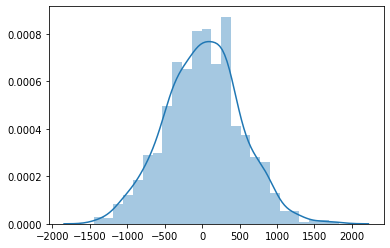

In [52]:
sns.distplot(Target)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

linreg = LinearRegression()
ridge = Ridge(alpha=756)
lasso = Lasso(alpha=20)

models = [linreg, ridge, lasso]
model_names = ['LinearRegression', 'Ridge', 'Lasso']

x = 0
for model in models:
    model.fit(X_train, y_train),
    model.predict(X_test),
    model.predict(X_train),
#     print(model_names[x], 'score for X_train: ', model.score(X_train, y_train))
#     print(model_names[x], 'score for X_test: ', model.score(X_test, y_test))
#     print()
    x +=1
    
pd.DataFrame(data=[coef, linreg.coef_, ridge.coef_, lasso.coef_], columns=['store_1', 'store_2', 'store_3', 'store_4', 'store_5', 'store_6', 'store_7', 'store_8', 'store_9', 'store_10'], index=['true_coef','predicted_coef_linear_regression','predicted_coef_ridge_regression', 'predicted_coef_lasso_regression'])   
#     pd.DataFrame(model.coef_, columns=['predicted_coef for' , model_names[x]], index=['store_1', 'store_2', 'store_3', 'store_4', 'store_5', 'store_6', 'store_7', 'store_8', 'store_9', 'store_10'])

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
true_coef,0.000000,26.746067,3.285346,0.000000,0.000000,86.508110,0.000000,0.000000,93.322255,12.444828
predicted_coef_linear_regression,1.866844,25.702129,-3.679188,-6.112337,34.886585,92.493703,20.896593,18.801634,43.946286,0.984736
predicted_coef_ridge_regression,2.349681,13.793480,-2.971854,-3.211851,16.354138,43.565217,9.351334,9.191844,20.898472,1.635359
predicted_coef_lasso_regression,0.000000,10.409554,-0.000000,-0.000000,14.670828,73.143455,0.377444,0.000000,24.208270,0.000000


In [54]:
x = 0
for model in models:
    model.score(X_test, y_test)
    x +=1
    

In [55]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

# Set up a list of Lasso alphas to check.
best_alpha_ridge = np.logspace(0, 5, 100)
best_alpha_lasso = np.linspace(0.1, 100, 100)
# Generates 100 values equally between 0.15 and 1.

# Cross-validate over our list of Ridge and Lasso alphas.
ridge_model = RidgeCV(alphas=best_alpha_ridge, cv=5)
lasso_model = LassoCV(alphas=best_alpha_lasso, cv=5)


# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(X_train, y_train)
lasso_model = lasso_model.fit(X_train, y_train)

In [56]:
ridge_optimal_alpha = ridge_model.alpha_
lasso_optimal_alpha = lasso_model.alpha_

print(ridge_optimal_alpha)
print(lasso_optimal_alpha)

756.463327554629
20.28181818181818


In [30]:
ridge_model.coef_

array([ 2.34931522, 13.78950123, -2.97123423, -3.21092829, 16.3488609 ,
       43.55112844,  9.34817935,  9.18895896, 20.8917629 ,  1.63515593])

In [58]:
lasso_model.coef_

array([ 0.        , 10.20684663, -0.        , -0.        , 14.38380513,
       72.8552813 ,  0.07864143,  0.        , 23.9382465 ,  0.        ])

In [67]:
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

0.05063735799191548
0.02555887792059819


In [70]:
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.03678281454015231
0.02273618572667846


In [71]:
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.041756115186114995
0.027538091780538676
